In [22]:
from abc import ABC
from torch import nn, Tensor, jit, randn, exp, cat, stack
import numpy as np
import torch
import torch.nn.init as init
import torch.optim as optim
import torch.nn.functional as F
from models.generators import EcgCNNGenerator
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
from torch.utils.data import ConcatDataset, DataLoader, sampler
from torchvision import transforms, datasets
import patient, ecg_mit_bih, dataset_configs, ecg_dataset_pytorch

SyntaxError: invalid syntax (2982682783.py, line 4)

In [9]:
    composed = transforms.Compose([ecg_dataset_pytorch.ToTensor()])
#     train_configs_N = dataset_configs.DatasetConfigs('train', one_vs_all=False, lstm_setting=False,
#                                         over_sample_minority_class=False,
#                                         under_sample_majority_class=False, only_take_heartbeat_of_type='N',
#                                         classified_heartbeat='N')
    
#     train_configs_S = dataset_configs.DatasetConfigs('train', one_vs_all=False, lstm_setting=False,
#                                     over_sample_minority_class=False,
#                                     under_sample_majority_class=False, only_take_heartbeat_of_type='S',
#                                     classified_heartbeat='S')

#     train_configs_V = dataset_configs.DatasetConfigs('train', one_vs_all=False, lstm_setting=False,
#                                 over_sample_minority_class=False,
#                                 under_sample_majority_class=False, only_take_heartbeat_of_type='V',
#                                 classified_heartbeat='V')

    train_configs_F = dataset_configs.DatasetConfigs('train', one_vs_all=False, lstm_setting=False,
                            over_sample_minority_class=False,
                            under_sample_majority_class=False, only_take_heartbeat_of_type='F',
                                classified_heartbeat='F')


#     test_configs_N = dataset_configs.DatasetConfigs('test', one_vs_all=False, lstm_setting=False,
#                                         over_sample_minority_class=False,
#                                         under_sample_majority_class=False, only_take_heartbeat_of_type='N',
#                                         classified_heartbeat='N')
    
#     test_configs_S = dataset_configs.DatasetConfigs('test', one_vs_all=False, lstm_setting=False,
#                                     over_sample_minority_class=False,
#                                     under_sample_majority_class=False, only_take_heartbeat_of_type='S',
#                                     classified_heartbeat='S')
        
#     test_configs_V = dataset_configs.DatasetConfigs('test', one_vs_all=False, lstm_setting=False,
#                                 over_sample_minority_class=False,
#                                 under_sample_majority_class=False, only_take_heartbeat_of_type='V',
#                                 classified_heartbeat='V')

#     test_configs_F = dataset_configs.DatasetConfigs('test', one_vs_all=False, lstm_setting=False,
#                             over_sample_minority_class=False,
#                             under_sample_majority_class=False, only_take_heartbeat_of_type='F',
#                             classified_heartbeat='F')
    

    #train_data_N = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=train_configs_N)
#     train_data_V = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=train_configs_V)
#     train_data_S = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=train_configs_S)
    train_data_F = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=train_configs_F)
    
    
    #test_data_N = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=test_configs_N)
#     test_data_V = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=test_configs_V)
#     test_data_S = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=test_configs_S)
#     test_data_F = ecg_dataset_pytorch.EcgHearBeatsDatasetPytorch(transform=composed, configs=test_configs_F)


done creating mit bih dataset
training
only take this heartbeat true
updated
length of data is  414


In [10]:
data = ConcatDataset([train_data_F])


In [11]:
indices = [i for i in range(int(1 * len(data)))]
loader = DataLoader(data, batch_size=64, sampler=sampler.SubsetRandomSampler(indices))

In [12]:
len(loader)

7

In [13]:
model_dir = "/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg_final/ECGCNN_Normal_wgan/generator.pt"
model = EcgCNNGenerator()
model.load_state_dict(torch.load(model_dir), strict=False)
model.eval()

EcgCNNGenerator(
  (layer1): Sequential(
    (0): ConvTranspose1d(100, 2048, kernel_size=(4,), stride=(1,), bias=False)
    (1): InstanceNorm1d(2048, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): ConvTranspose1d(2048, 1024, kernel_size=(4,), stride=(1,), bias=False)
    (1): InstanceNorm1d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): ConvTranspose1d(1024, 512, kernel_size=(4,), stride=(2,), padding=(1,), bias=False)
    (1): InstanceNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
  (layer4): Sequential(
    (0): ConvTranspose1d(512, 256, kernel_size=(3,), stride=(2,), padding=(1,), bias=False)
    (1): InstanceNorm1d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): ReLU(inplace=True)
  )
  (layer5): Sequential(
    (0): 

In [33]:
fake_ecg = model(randn(100, 100))

In [35]:
fake_ecg = fake_ecg.detach().numpy()

<AxesSubplot:>

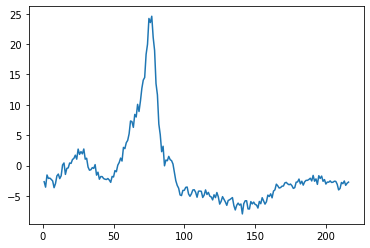

In [42]:
sns.lineplot(x = range(1,217), y=fake_ecg[1,:].squeeze())